In [2]:
import pandas as pd
import ydata_profiling as yp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "../data/homicidios.xlsx"
df_auto_profile = pd.read_excel(file_path, sheet_name="HECHOS")
df = df_auto_profile.copy()

In [6]:
print(df.shape)
df.head

(696, 21)


<bound method NDFrame.head of             ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
0    2016-0001           1 2016-01-01  2016   1   1  04:00:00   4   
1    2016-0002           1 2016-01-02  2016   1   2  01:15:00   1   
2    2016-0003           1 2016-01-03  2016   1   3  07:00:00   7   
3    2016-0004           1 2016-01-10  2016   1  10  00:00:00   0   
4    2016-0005           1 2016-01-21  2016   1  21  05:20:00   5   
..         ...         ...        ...   ...  ..  ..       ...  ..   
691  2021-0093           1 2021-12-13  2021  12  13  17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20  01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30  00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15  10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18  06:10:00   6   

                               LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0    AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ..

In [7]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [8]:
# Convert the 'HORA' column to a numerical value
#df['HORA'] = pd.to_numeric(df['HORA'], errors='coerce')
# Convert the 'HH' column to a numerical value
#df['HH'] = pd.to_numeric(df['HH'], errors='coerce')


profile = yp.ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['HH', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle',
       'Cruce', 'Dirección Normalizada', 'XY (CABA)', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

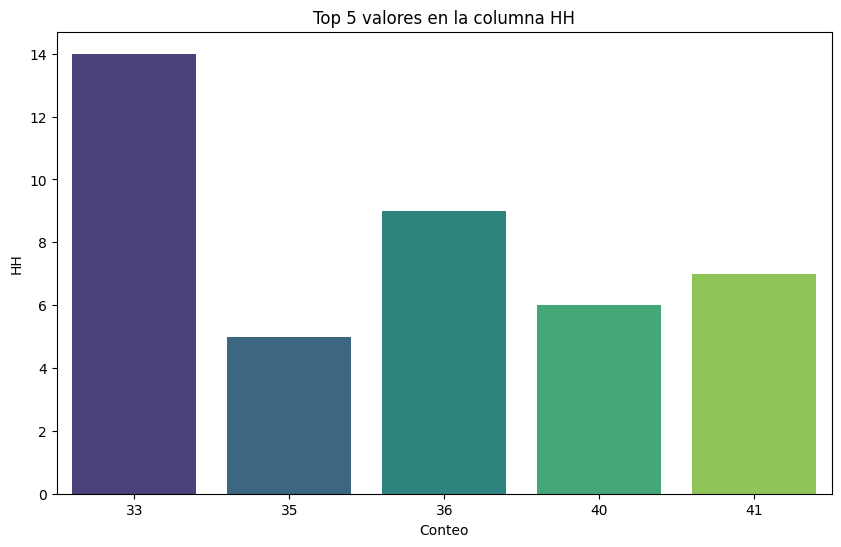

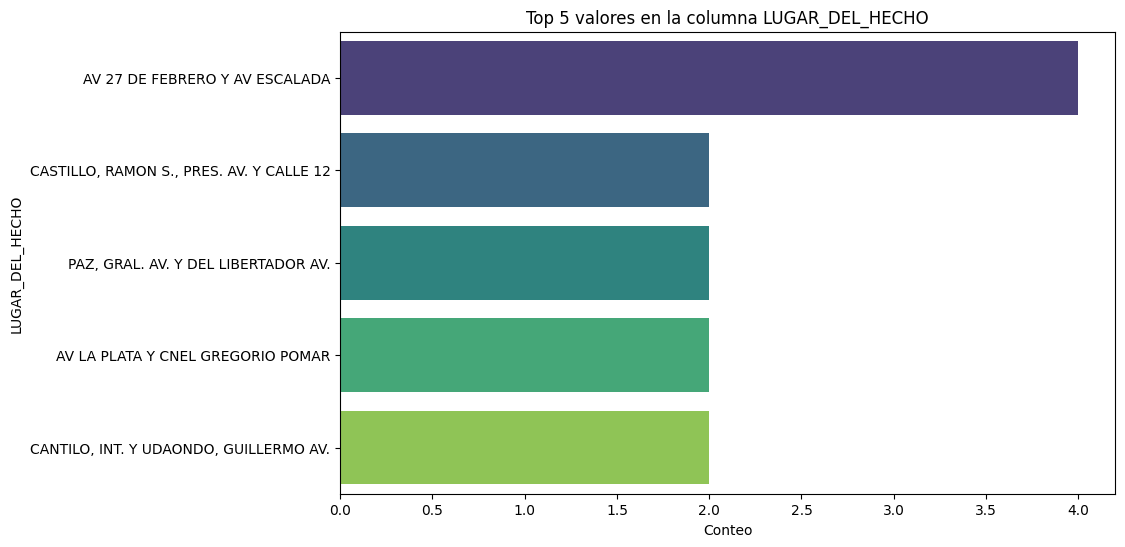

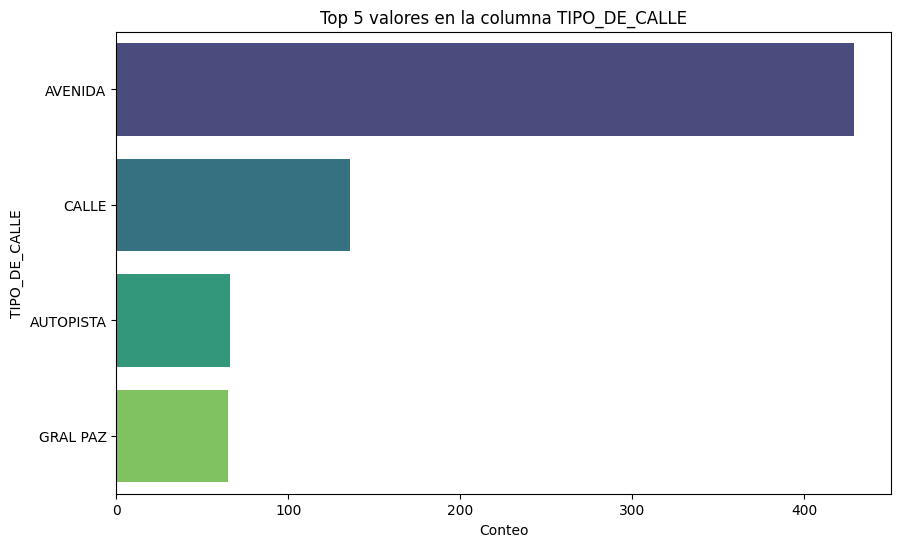

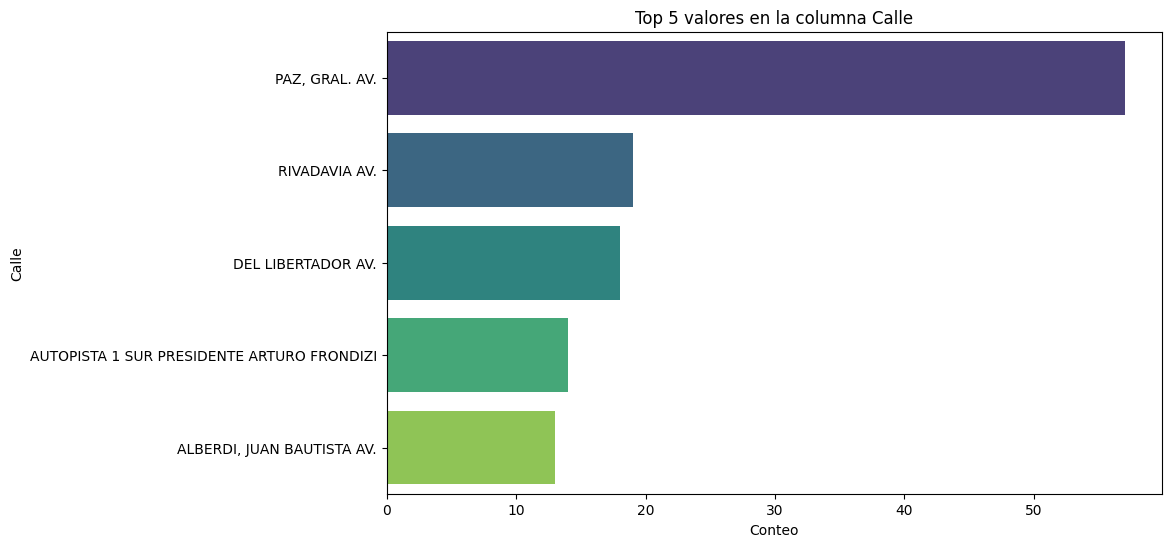

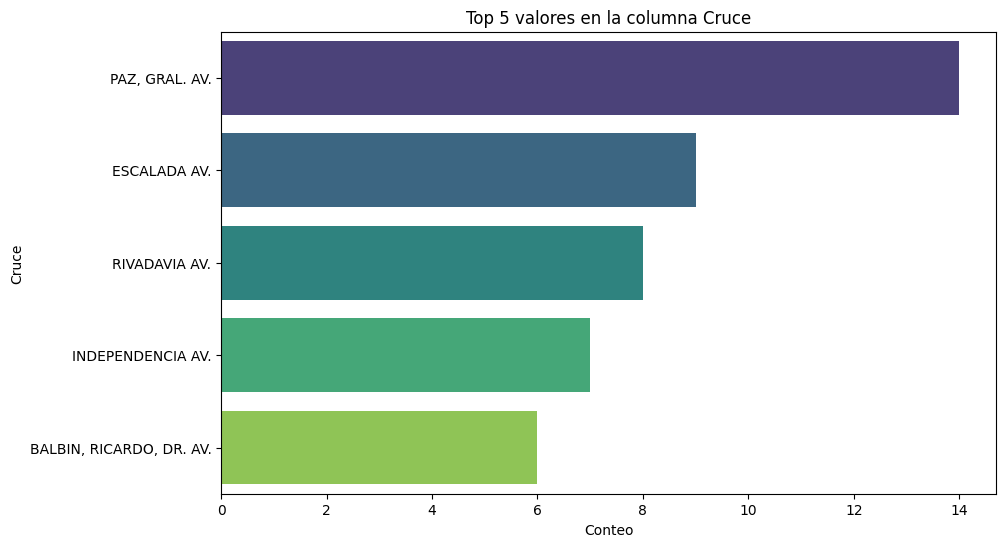

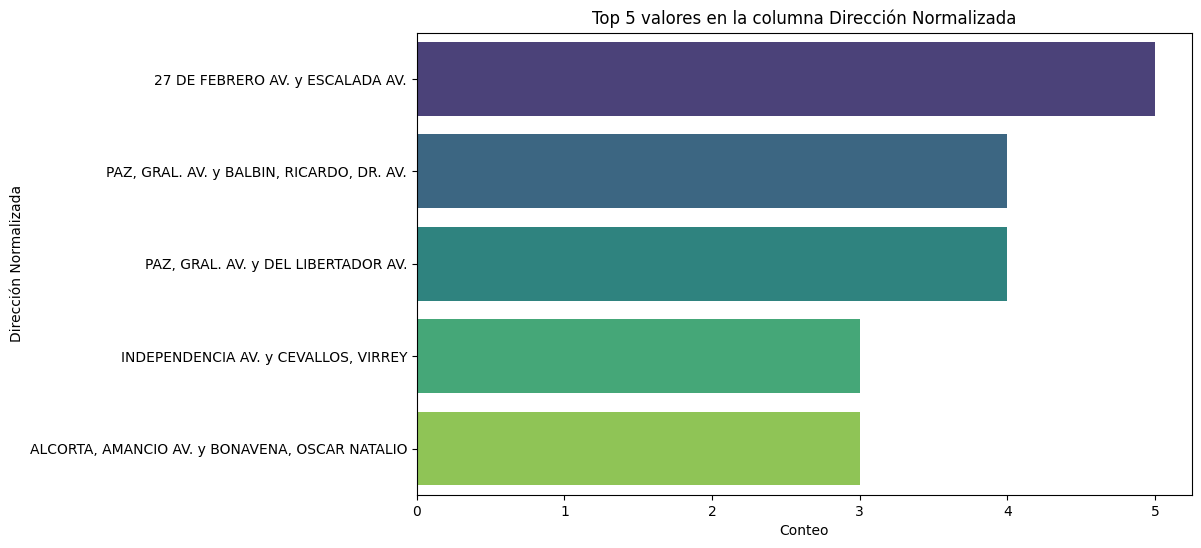

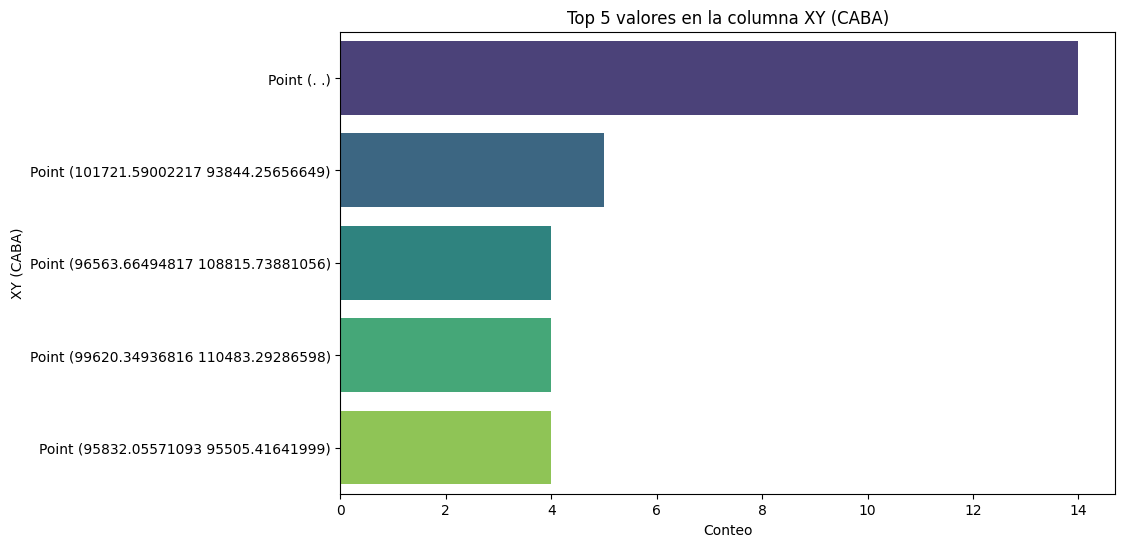

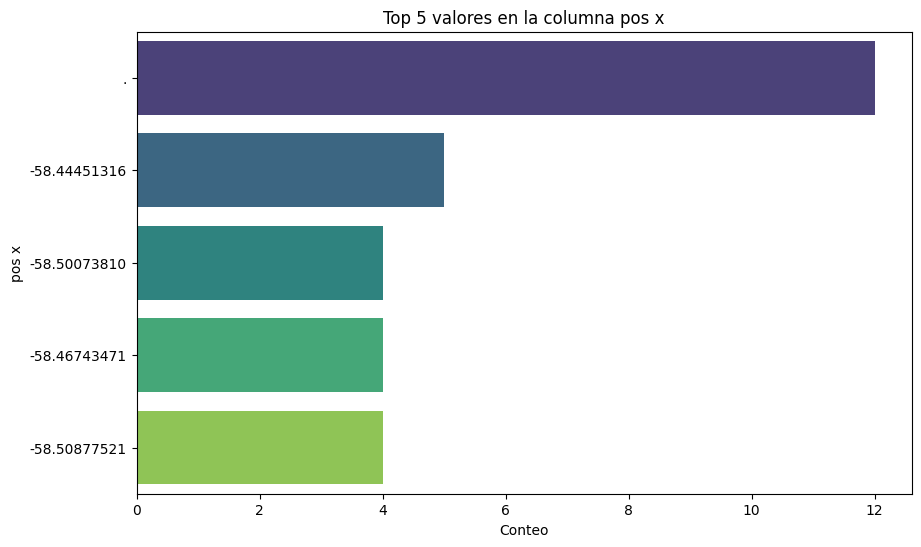

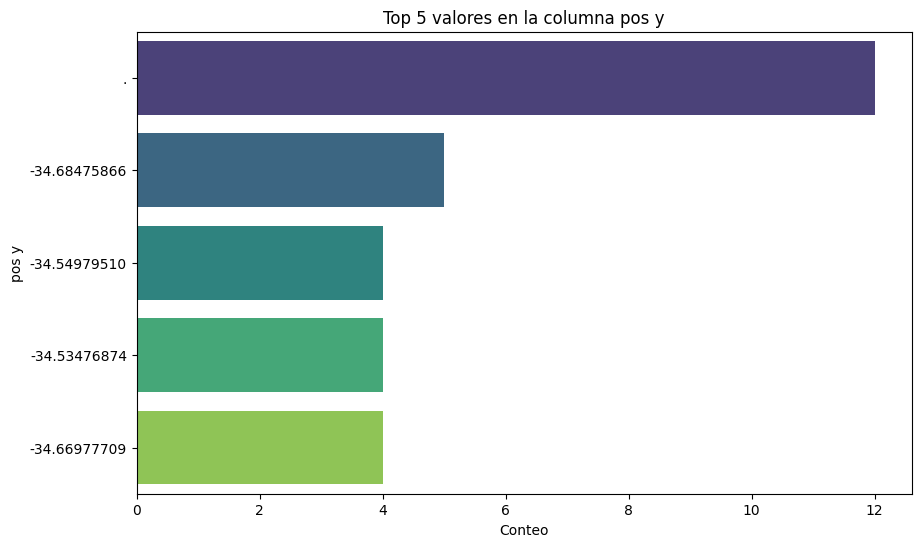

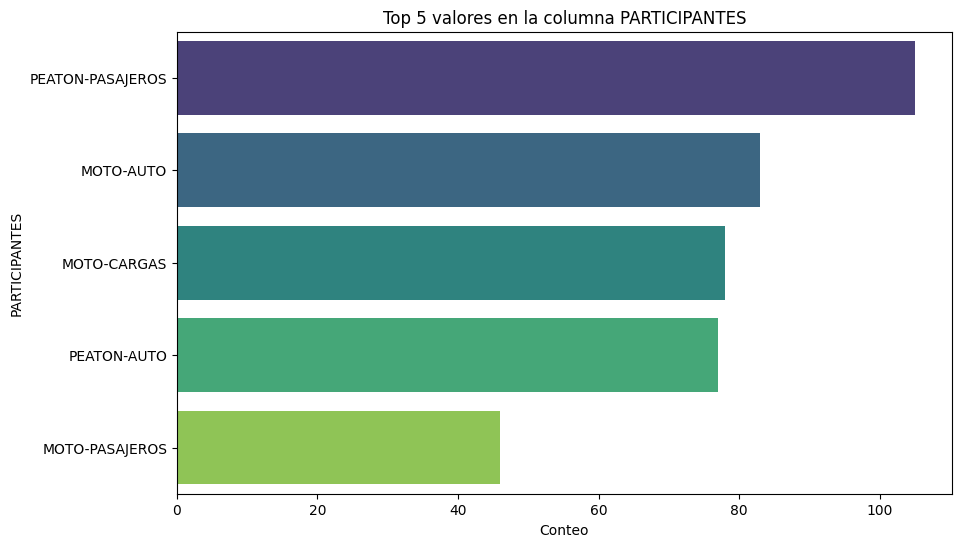

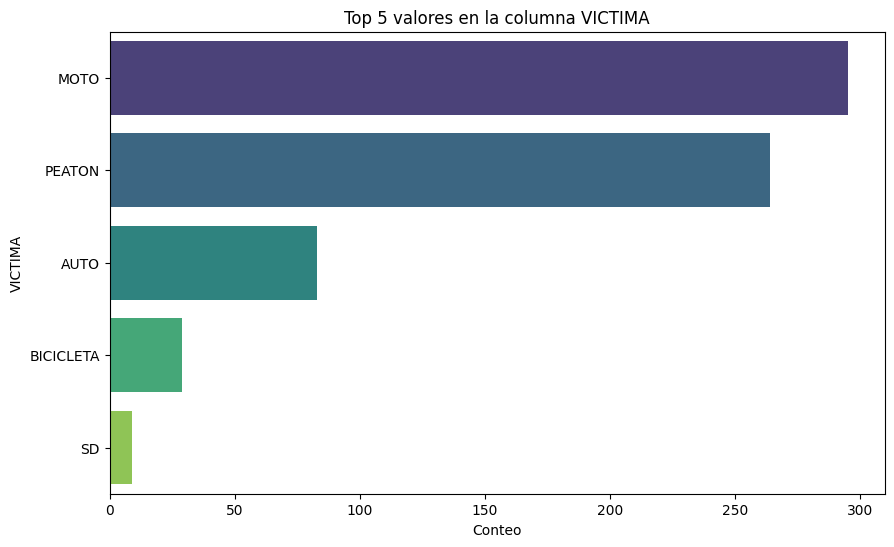

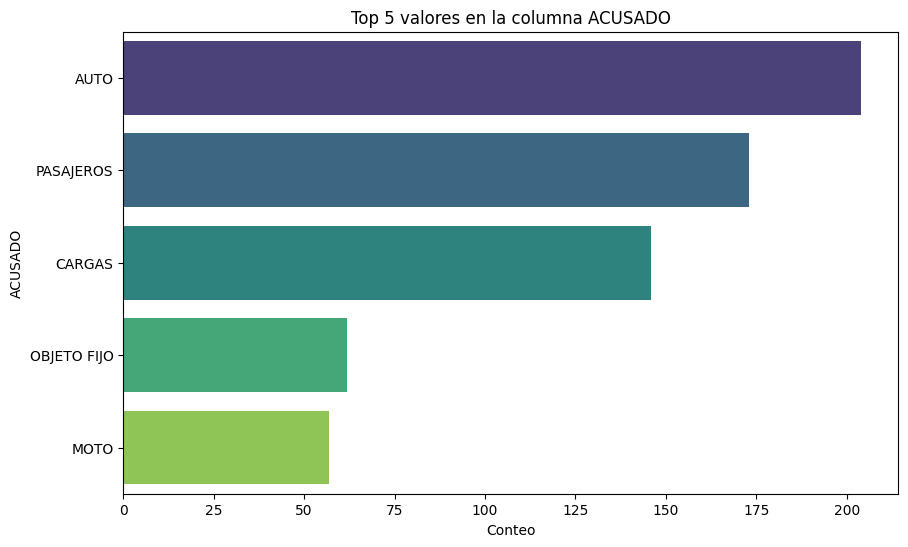

In [12]:
# Especifica el número de top N que deseas mostrar
top_n = 5

# Itera sobre tus columnas categóricas
for col in col_cat:
    # Calcula el conteo de cada valor
    counts = df[col].value_counts()

    # Selecciona los top N valores
    top_n_values = counts.head(top_n)

    # Crea un gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_n_values.values, y=top_n_values.index, palette="viridis")

    # Añade etiquetas y título
    plt.title(f"Top {top_n} valores en la columna {col}")
    plt.xlabel("Conteo")
    plt.ylabel(col)
    
    # Muestra el gráfico
    plt.show()

In [13]:
# Selecciona los registros donde "pos x" o "pos y" tiene el valor "."
filtered_df = df.loc[(df['pos x'] == '.') | (df['pos y'] == '.')]

# Muestra los primeros 3 registros seleccionados
print(filtered_df.head(4))

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
38   2016-0052           1 2016-04-20  2016   4  20  20:00:00  20   
106  2016-0136           1 2016-10-25  2016  10  25  00:00:00   0   
119  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   
139  2016-0174           1 2016-12-27  2016  12  27  00:00:00   0   

                      LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce  \
38         AUTOPISTA LUGONES PK 10000     AUTOPISTA  ...    NaN    NaN   
106  AU BUENOS AIRES - LA PLATA KM. 4     AUTOPISTA  ...    NaN    NaN   
119                                SD         CALLE  ...    NaN    NaN   
139              AUTOPISTA 25 DE MAYO     AUTOPISTA  ...    NaN    NaN   

    Dirección Normalizada COMUNA    XY (CABA) pos x pos y PARTICIPANTES  \
38                    NaN     13  Point (. .)     .     .       MOTO-SD   
106                   NaN      4  Point (. .)     .     .   MOTO-CARGAS   
119                   NaN      0  Point (. .)     .     . 

Veamos inicialmente el comportamiento de las variables numéricas ('age' y 'balance')

In [14]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
df.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


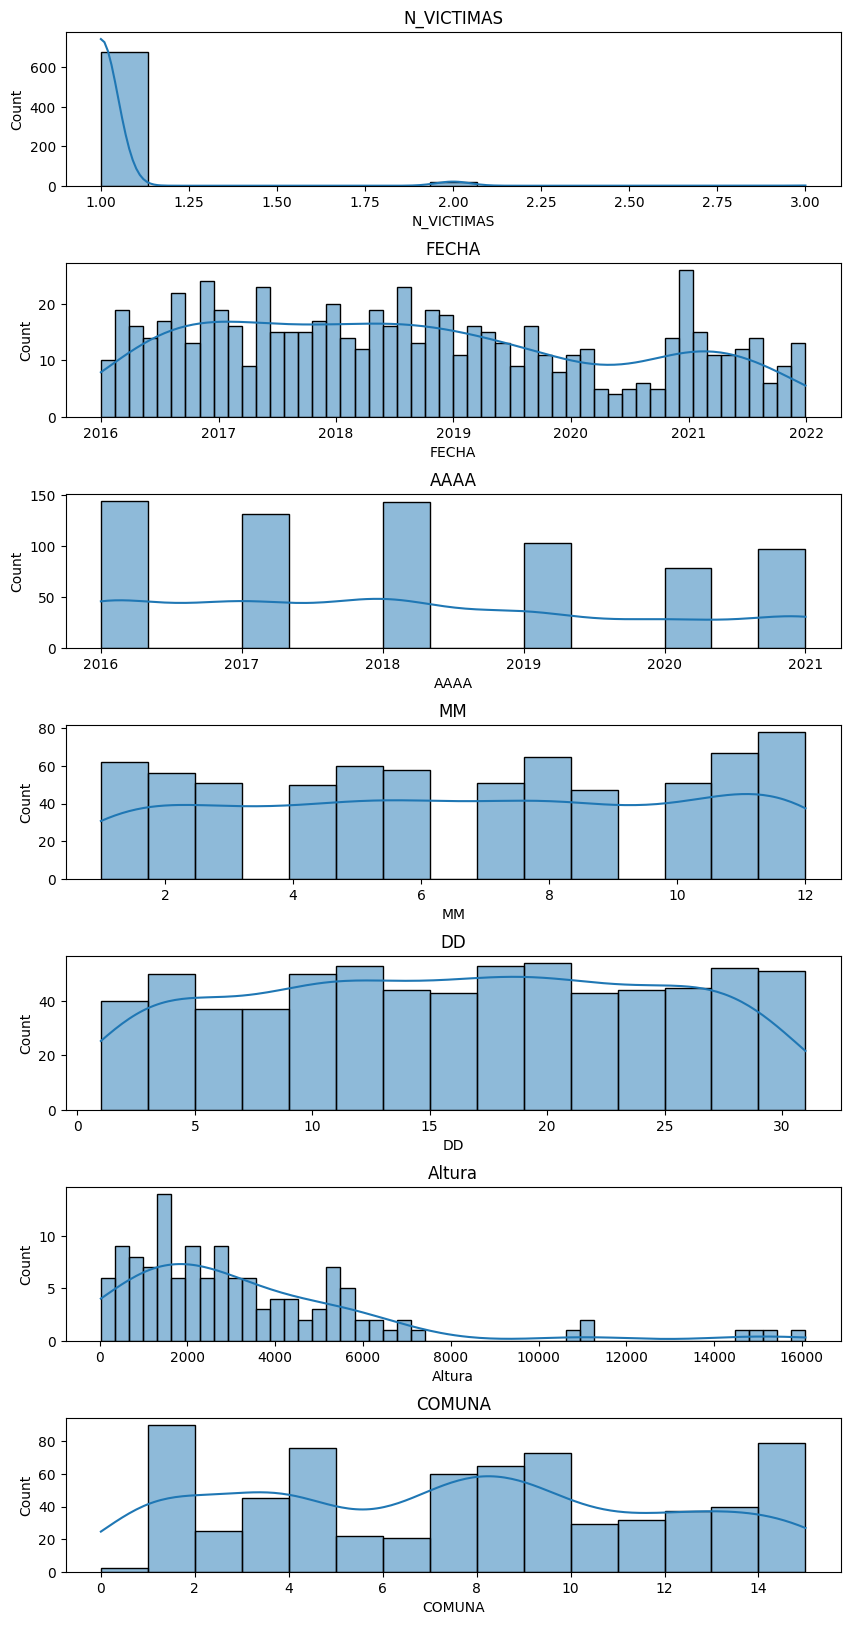

In [29]:
col_num = ['N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'Altura', 'COMUNA']

# Ajusta nrows a la longitud de col_num
fig, ax = plt.subplots(nrows=len(col_num), ncols=1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    nbins = 15 if col in ['N_VICTIMAS', 'AAAA', 'MM', 'DD', 'COMUNA'] else 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

plt.show()